# KNN Models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../lib')

import numpy as np
import pandas as pd

import torch
import pytorch_common.util as pu

import model as ml
import data.dataset as ds
import metric as mt

<Figure size 432x288 with 0 Axes>

In [3]:
pu.LoggerBuilder().on_console().build()

<RootLogger root (INFO)>

In [4]:
pu.set_device_name('gpu')
cpu = torch.device("cpu")

In [5]:
pu.get_device()

device(type='cuda', index=0)

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.__version__

'1.11.0'

## Carga de dataset

1. importamos los archivos de peliculas y ratings preprocesados prebiamente en mongodb:

In [8]:
def features_fn(obs, device): return torch.tensor(obs[['user_seq', 'movie_seq']].values).to(device)
def target_fn(obs, device):   return torch.tensor(obs['user_movie_rating'].values).to(device)

In [9]:
dataset = ds.MovieLensTMDbJSONDataset(transform=features_fn, target_transform=target_fn, device=cpu)

In [10]:
user_predictor = ml.KNNUserBasedPredictor.from_data_frame(
    data          = dataset.data,
    user_seq_col  = 'user_seq',
    movie_seq_col = 'movie_seq',
    rating_col    = 'user_movie_rating',
    distance      = ml.CosineDistance()
)
# user_predictor.plot()

build ratting matrix |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 199791/199791 [100%] in 9.6s (20750.14/s)               
build distances matrix |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 13280/13280 [100%] in 3:08.0 (70.64/s)                977/13280 [7%] in 13s (76.0/s, eta: 2:42) 1023/13280 [8%] in 14s (75.7/s, eta: 2:42) 1033/13280 [8%] in 14s (75.6/s, eta: 2:42) ←↖↑ 1108/13280 [8%] in 15s (75.3/s, eta: 2:42) 1118/13280 [8%] in 15s (75.2/s, eta: 2:42)  ↙←↖ 1132/13280 [9%] in 15s (75.1/s, eta: 2:42) ↖↑↗ 1138/13280 [9%] in 15s (75.0/s, eta: 2:42) |▉▉▉▍                                    | ↗→↘ 1145/13280 [9%] in 15s (75.0/s, eta: 2:42) 1148/13280 [9%] in 15s (75.0/s, eta: 2:42) ↓↙← 1156/13280 [9%] in 15s (75.0/s, eta: 2:42) 1159/13280 [9%] in 15s (74.9/s, eta: 2:42)  1166/13280 [9%] in 16s (74.9/s, eta: 2:42) (74.9/s, eta: 2:42) ↖↑↗ 1194/13280 [9%] in 16s (74.8/s, eta: 2:42) 1234/13280 [9%] in 17s (74.5/s, eta: 2:42) 1339/13280 [10%] in 18s (73.8/s, eta: 2:42) (73.9/s, eta: 2:42) 1484/

In [11]:
item_predictor = ml.KNNItemBasedPredictor.from_data_frame(
    data          = dataset.data,
    user_seq_col  = 'user_seq',
    movie_seq_col = 'movie_seq',
    rating_col    = 'user_movie_rating',
    distance      = ml.CosineDistance()
)
# item_predictor.plot()

build ratting matrix |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 199791/199791 [100%] in 9.6s (20802.58/s)               
build distances matrix |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 22081/22081 [100%] in 8:19.5 (44.21/s)                


In [26]:
n_samples   = 20
n_neighbors = 5000
batch_size  = 100

validator = ml.Validator(
    n_samples, 
    batch_size,
    metrics = [
        mt.RMSEMetric(),
        mt.RecallMetric(),
        mt.PrecisionMetric(),
        mt.FBetaMetric()
    ],
    predictors=[user_predictor, item_predictor]
)

In [27]:
summary = validator.validate(dataset, n_neighbors=n_neighbors)

|▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 20/20 [100%] in 8:27.4 (0.04/s)                                              0/20 [0%] in 22s (0.0/s, eta: -) 0/20 [0%] in 25s (0.0/s, eta: -) 


Predictor: KNNItemBasedPredictor

Range: (0.2161, 0.4365)



<Figure size 1080x288 with 2 Axes>

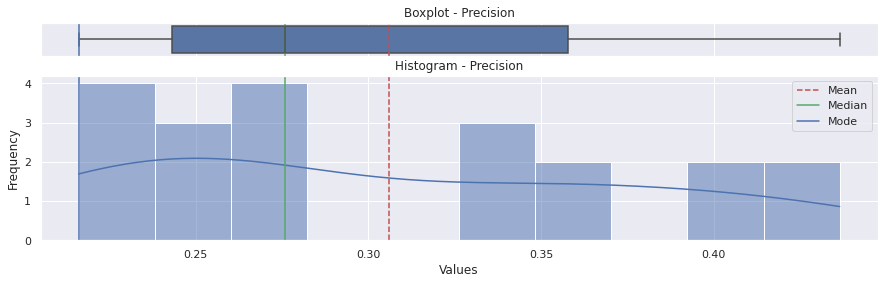


Metrics:



,Precision
count,20.000000
mean,0.305965
std,0.074614
min,0.216100
25%,0.243200
50%,0.275750
75%,0.357750
max,0.436500


Predictor: KNNUserBasedPredictor

Range: (0.1118, 0.435)



<Figure size 1080x288 with 2 Axes>

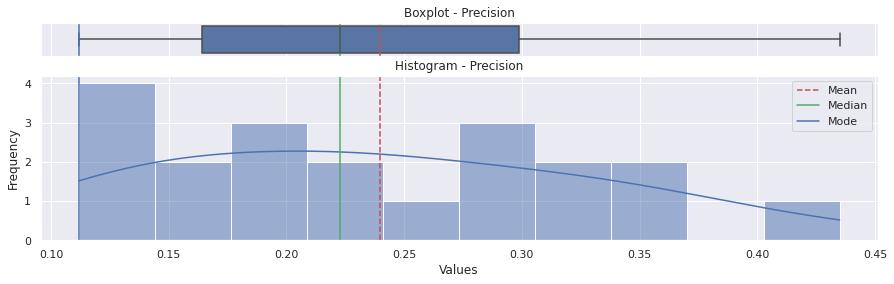


Metrics:



,Precision
count,20.000000
mean,0.239620
std,0.092896
min,0.111800
25%,0.164075
50%,0.222700
75%,0.298675
max,0.435000


Predictor: KNNItemBasedPredictor

Range: (0.2022, 0.4206)



<Figure size 1080x288 with 2 Axes>

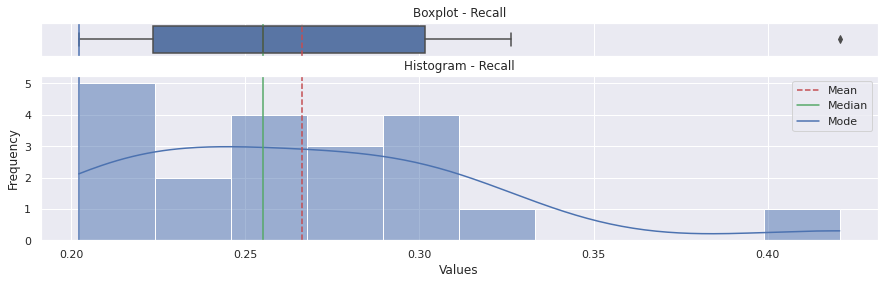


Metrics:



,Recall
count,20.000000
mean,0.266225
std,0.053034
min,0.202200
25%,0.223450
50%,0.255100
75%,0.301600
max,0.420600


Predictor: KNNUserBasedPredictor

Range: (0.1275, 0.4892)



<Figure size 1080x288 with 2 Axes>

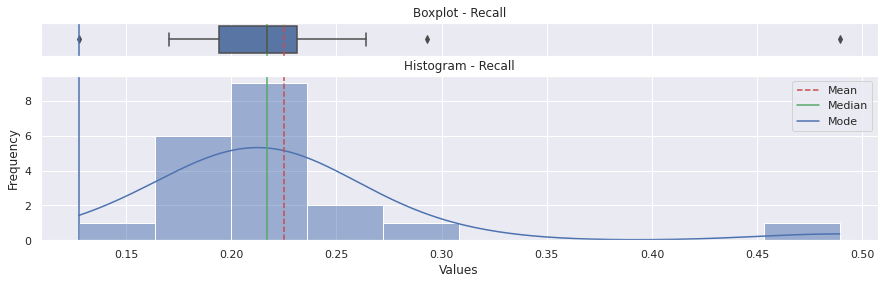


Metrics:



,Recall
count,20.000000
mean,0.225240
std,0.071678
min,0.127500
25%,0.194175
50%,0.217100
75%,0.231425
max,0.489200


Predictor: KNNItemBasedPredictor

Range: (0.9193999767303467, 1.3269000053405762)



<Figure size 1080x288 with 2 Axes>

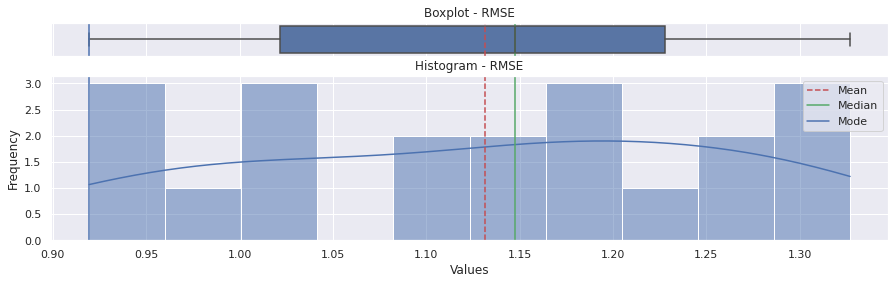


Metrics:



,RMSE
count,20.000000
mean,1.131370
std,0.135053
min,0.919400
25%,1.021675
50%,1.147500
75%,1.228000
max,1.326900


Predictor: KNNUserBasedPredictor

Range: (0.9253000020980835, 1.3183000087738037)



<Figure size 1080x288 with 2 Axes>

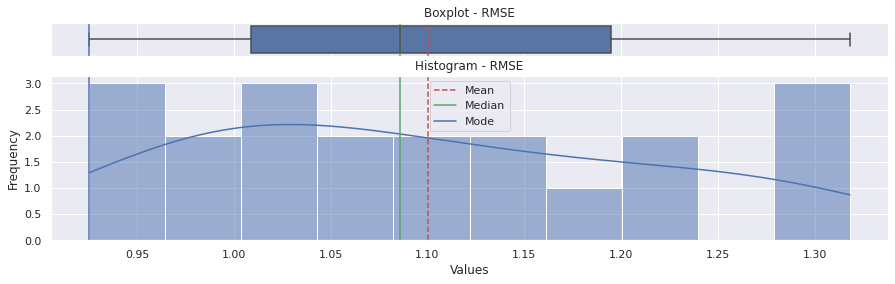


Metrics:



,RMSE
count,20.000000
mean,1.100095
std,0.120888
min,0.925300
25%,1.008850
50%,1.086100
75%,1.194900
max,1.318300


Predictor: KNNItemBasedPredictor

Range: (0.1926, 0.3183)



<Figure size 1080x288 with 2 Axes>

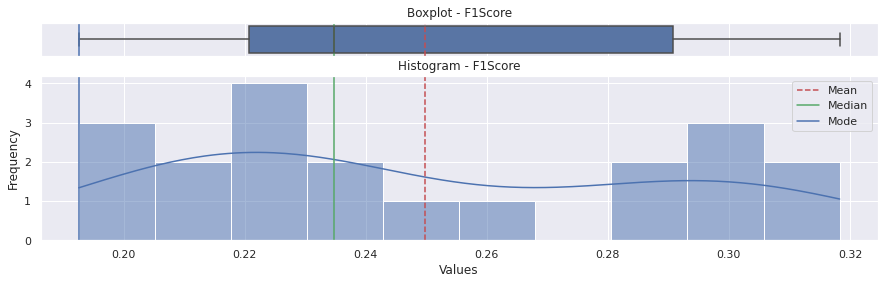


Metrics:



,F1Score
count,20.000000
mean,0.249870
std,0.040715
min,0.192600
25%,0.220775
50%,0.234750
75%,0.290800
max,0.318300


Predictor: KNNUserBasedPredictor

Range: (0.1189, 0.3552)



<Figure size 1080x288 with 2 Axes>

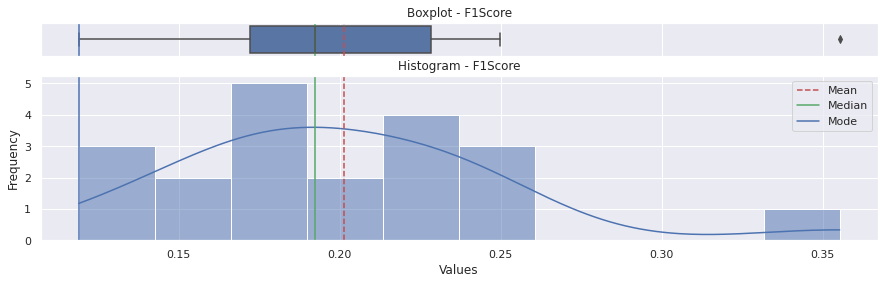


Metrics:



,F1Score
count,20.000000
mean,0.201125
std,0.051667
min,0.118900
25%,0.172175
50%,0.192250
75%,0.228300
max,0.355200


In [28]:
summary.plot()